In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/spotify_tracks.csv')
data.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


## Lets print columns names

In [3]:
data.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit'],
      dtype='object')

Based upon the column names in the dataset. I think, i have to create four sperate tables for my database
1. Songs Table (id, name, popularity, duration_ms)
2. Genres Table (id, genre)
3. Artists Table (id, name)
3. Albums Table (id, album)


In [19]:
# song table
song_df = data[['name', 'popularity', 'duration_ms']].drop_duplicates(subset=['name','popularity','duration_ms']).reset_index(drop=True)
song_df['duration_sec'] = song_df['duration_ms'].apply(lambda x: x/(1000*60))
song_df.head()

,name,popularity,duration_ms,duration_sec
0,Acoustic,58,172199,2.869983
1,Acoustic,57,172202,2.870033
2,Here Comes the Sun - Acoustic,42,144786,2.413100
3,Acoustic #3,46,116573,1.942883
4,My Love Mine All Mine - Acoustic Instrumental,33,133922,2.232033


(0.0, 15.0)

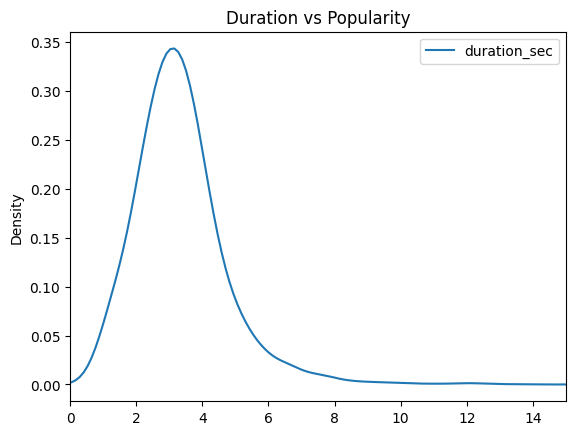

In [28]:
song_df.plot(x='popularity', y='duration_sec', kind='kde', title='Duration vs Popularity')
plt.xlim(0, 15)

/home/zafrani/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zafrani/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


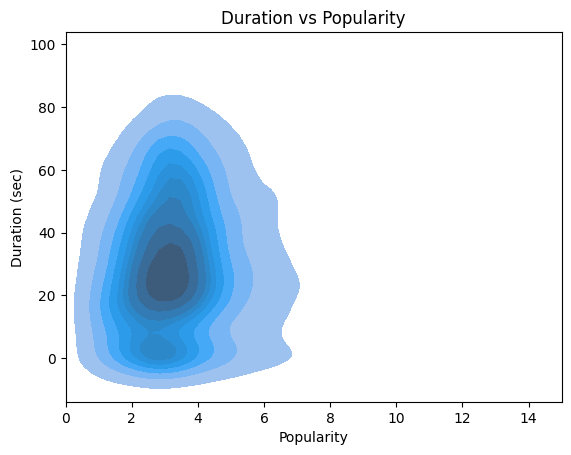

In [29]:
sns.kdeplot(x=song_df['duration_sec'], y=song_df['popularity'], fill=True)
plt.xlim(0, 15)
plt.title('Duration vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Duration (sec)')
plt.show()

In [14]:
# genre table
genre_df = data[['genre']].drop_duplicates().reset_index(drop=True)
genre_df.value_counts()

genre      
acoustic       1
afrobeat       1
alt-rock       1
alternative    1
ambient        1
              ..
trance         1
trip-hop       1
turkish        1
work-out       1
world-music    1
Name: count, Length: 126, dtype: int64

In [9]:
# artist table
artist_df = data[['artists']].drop_duplicates().reset_index(drop=True)
artist_df.head()

,artists
0,Billy Raffoul
1,"Molly Hocking, Bailey Rushlow"
2,The Goo Goo Dolls
3,"Guus Dielissen, Casper Esmann"
4,Ling tosite sigure


In [10]:
# album table
album_df = data[['album']].drop_duplicates().reset_index(drop=True)
album_df.head()

,album
0,1975
1,A Few More Hours at YYZ
2,Here Comes the Sun (Acoustic)
3,Dizzy up the Girl
4,My Love Mine All Mine (Acoustic Instrumental)
